# CIA coefficient

Collisional Induced Absorption (CIA) refers to the phenomenon where temporary interactions between molecules during collisions induce a transient dipole moment, enabling the absorption of radiation that would not occur in isolated molecules. This mechanism is particularly significant in environments with non-polar molecules, such as H22 and He, where typical dipole-induced transitions are absent.

In the context of planetary and brown dwarf atmospheres, CIA is particularly important as a source of continuum opacity in the spectra of hydrogen-rich gas planets. In ExoJAX, the `CdbCIA` class can be used for database I/O to access CIA data provided by HITRAN. 

For examples of actual usage, please refer to resources such as the [get started](get_started.html) guide.

In [2]:
from exojax.utils.grids import wavenumber_grid

nu_grid, wav, res = wavenumber_grid(5000, 50000, 1000, unit="AA", xsmode="lpf")

from exojax.spec import contdb
cdbH2H2 = contdb.CdbCIA(".database/H2-H2_2011.cia", nu_grid)

xsmode =  lpf
xsmode assumes ESLOG in wavenumber space: xsmode=lpf
The wavenumber grid should be in ascending order.
The users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order
H2-H2


For opacity calculations, the [OpaCIA](../exojax/exojax.spec.html#exojax.spec.opacont.OpaCIA) class is available.

In [3]:
from exojax.spec.opacont import OpaCIA
opacia = OpaCIA(cdbH2H2, nu_grid=nu_grid)

Let's calculate (the logarithm of) the CIA absorption coefficient at three different temperatures. To compute them all at once, you can use `opa.logacia_matrix`. (If you want to calculate it for a single temperature, you can use `opa.logacia_vector` instead.)

In [9]:
import jax.numpy as jnp
Tfix = jnp.array([1000.0, 1300.0, 1600.0])

lc = opacia.logacia_matrix(Tfix)

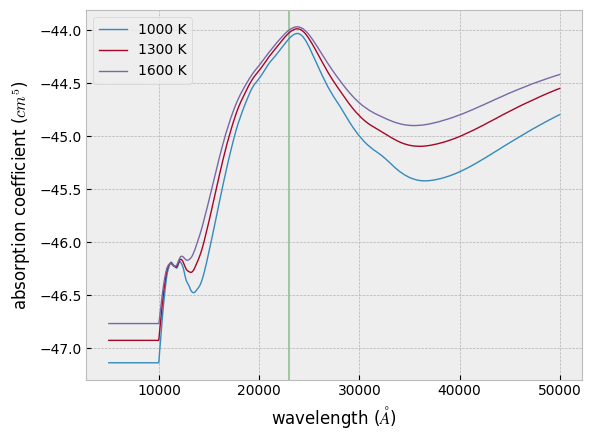

In [7]:
import matplotlib.pyplot as plt

plt.style.use("bmh")
for i in range(0, len(Tfix)):
    plt.plot(wav, lc[i, :], lw=1, label=str(int(Tfix[i])) + " K")
plt.axvspan(22876.0, 23010.0, alpha=0.3, color="green")
plt.xlabel("wavelength ($\\AA$)")
plt.ylabel("absorption coefficient ($cm^5$)")
plt.legend()
plt.savefig("cia.png")

In practice, this simply performs interpolation within the CIA database grid. `cdb.tcia` contains the temperature axis, `cdb.nucia` holds the wavenumber values, and `cdb.logac` stores the logarithmic absorption coefficients.

In [10]:
from exojax.spec.hitrancia import interp_logacia_vector
lc = interp_logacia_vector(Tfix, nu_grid, cdbH2H2.nucia, cdbH2H2.tcia, cdbH2H2.logac).T